In [210]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [211]:
import numpy as np
import pandas as pd

import geopandas
import geojsonio
from shapely.geometry import Point

import missingno as msn

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# To create interactive maps
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as offline
from plotly import tools
init_notebook_mode(connected=True)
offline.init_notebook_mode()

# To create interactive plots
from bokeh.models import ColumnDataSource, HoverTool, WheelZoomTool, ResetTool, PanTool
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()

# To sort dictionaries
import operator

# To generate word clouds
from wordcloud import WordCloud

import os

Loading BokehJS ...

In [212]:
os.chdir('gun-violence-data/')
os.getcwd()
os.listdir()

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'gun-violence-data/'

In [213]:
gv_df = pd.read_csv('cleaned_data.csv') #gun-violence-data_01-2013_03-2018.csv')
pop_df = pd.read_csv('sc-est2018-alldata6.csv')

In [214]:
gv_df.shape
pop_df.shape

(239399, 33)

(236844, 20)

In [215]:
gv_df.columns.values
pop_df.columns.values

array(['Unnamed: 0', 'incident_id', 'date', 'state', 'city_or_county',
       'n_killed', 'n_injured', 'latitude', 'location_description',
       'longitude', 'n_guns_involved', 'children', 'teen', 'adults',
       'Male', 'Female', 'Accidental Shooting',
       'Attempted Murder/Suicide', 'Armed Robbery', 'Bar/Club Incident',
       'Children Injured/Killed', 'Defensive Use', 'Drug Related',
       'Gang Related', 'Incident at School', 'Home Invastion',
       'Mass Shooting', 'Murder/Suicide', 'OfficerInvolved', 'Terrorism',
       'Month', 'DayofWeek', 'Year'], dtype=object)

array(['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'NAME', 'SEX', 'ORIGIN',
       'RACE', 'AGE', 'CENSUS2010POP', 'ESTIMATESBASE2010',
       'POPESTIMATE2010', 'POPESTIMATE2011', 'POPESTIMATE2012',
       'POPESTIMATE2013', 'POPESTIMATE2014', 'POPESTIMATE2015',
       'POPESTIMATE2016', 'POPESTIMATE2017', 'POPESTIMATE2018'],
      dtype=object)

In [216]:
gv_df_orig = gv_df.copy(deep=True)

In [217]:
gv_df.columns.values

array(['Unnamed: 0', 'incident_id', 'date', 'state', 'city_or_county',
       'n_killed', 'n_injured', 'latitude', 'location_description',
       'longitude', 'n_guns_involved', 'children', 'teen', 'adults',
       'Male', 'Female', 'Accidental Shooting',
       'Attempted Murder/Suicide', 'Armed Robbery', 'Bar/Club Incident',
       'Children Injured/Killed', 'Defensive Use', 'Drug Related',
       'Gang Related', 'Incident at School', 'Home Invastion',
       'Mass Shooting', 'Murder/Suicide', 'OfficerInvolved', 'Terrorism',
       'Month', 'DayofWeek', 'Year'], dtype=object)

In [218]:
# gv_df.drop(columns=['incident_url','source_url','incident_url_fields_missing',
# 'notes','participant_name','sources','address',
# 'congressional_district','state_house_district','state_senate_district'],inplace=True)
# gv_df.columns.values

In [219]:
gv_df['hurt'] = gv_df['n_killed'] + gv_df['n_injured']

In [220]:
gv_df.date = pd.to_datetime(gv_df.date)
gv_df.set_index('date', inplace=True)

In [221]:
gv_df.head()
gv_df.info()
gv_df.describe()

Unnamed: 0  incident_id       state city_or_county  n_killed  \
date                                                                       
2014-01-01         278        95289    Michigan       Muskegon         0   
2014-01-01         279        92401  New Jersey         Newark         0   
2014-01-01         280        92383    New York         Queens         1   
2014-01-01         281        92142    New York       Brooklyn         0   
2014-01-01         282        95261    Missouri    Springfield         0   

            n_injured  latitude location_description  longitude  \
date                                                              
2014-01-01          0   43.2301                  NaN   -86.2514   
2014-01-01          0   40.7417                  NaN   -74.1695   
2014-01-01          0   40.7034                  NaN   -73.7474   
2014-01-01          1   40.6715                  NaN   -73.9476   
2014-01-01          1   37.2646                  NaN   -93.3007   

            n_guns_involved  ...  Incident at School  Home Invastion  \
date                         ...                                       
2014-01-01              NaN  ...                   0               0   
2014-01-01              NaN  ...                   0               0   
2014-01-01              NaN  ...                   0               0   
2014-01-01              NaN  ...                   0               0   
2014-01-01              NaN  ...                   0               0   

            Mass Shooting  Murder/Suicide  OfficerInvolved  Terrorism  \
date                                                                    
2014-01-01              0               0                0          0   
2014-01-01              0               0                1          0   
2014-01-01              0               0                0          0   
2014-01-01              0               0                0          0   
2014-01-01              0               0                0          0   

              Month  DayofWeek  Year  hurt  
date                                        
2014-01-01  January  Wednesday  2014     0  
2014-01-01  January  Wednesday  2014     0  
2014-01-01  January  Wednesday  2014     1  
2014-01-01  January  Wednesday  2014     1  
2014-01-01  January  Wednesday  2014     1  

[5 rows x 33 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 239399 entries, 2014-01-01 to 2018-03-31
Data columns (total 33 columns):
Unnamed: 0                  239399 non-null int64
incident_id                 239399 non-null int64
state                       239399 non-null object
city_or_county              239399 non-null object
n_killed                    239399 non-null int64
n_injured                   239399 non-null int64
latitude                    231478 non-null float64
location_description        42001 non-null object
longitude                   231478 non-null float64
n_guns_involved             140126 non-null float64
children                    239399 non-null int64
teen                        239399 non-null int64
adults                      239399 non-null int64
Male                        239399 non-null int64
Female                      239399 non-null int64
Accidental Shooting         239399 non-null int64
Attempted Murder/Suicide    239399 non-null int64
Armed Robbery  

Unnamed: 0   incident_id       n_killed      n_injured  \
count  239399.000000  2.393990e+05  239399.000000  239399.000000   
mean   119977.000000  5.593864e+05       0.251258       0.490491   
std     69108.682884  2.932675e+05       0.518586       0.718764   
min       278.000000  9.211400e+04       0.000000       0.000000   
25%     60127.500000  3.082770e+05       0.000000       0.000000   
50%    119977.000000  5.440700e+05       0.000000       0.000000   
75%    179826.500000  8.174505e+05       0.000000       1.000000   
max    239676.000000  1.083472e+06      50.000000      53.000000   

            latitude      longitude  n_guns_involved       children  \
count  231478.000000  231478.000000    140126.000000  239399.000000   
mean       37.546525     -89.337607         1.372558       0.018551   
std         5.131668      14.358253         4.679847       0.167201   
min        19.111400    -171.429000         1.000000       0.000000   
25%        33.903000     -94.157075         1.000000       0.000000   
50%        38.570300     -86.249900         1.000000       0.000000   
75%        41.439675     -80.049600         1.000000       0.000000   
max        71.336800      97.433100       400.000000      11.000000   

                teen         adults  ...   Drug Related   Gang Related  \
count  239399.000000  239399.000000  ...  239399.000000  239399.000000   
mean        0.104633       1.251020  ...       0.070852       0.023229   
std         0.411654       1.139911  ...       0.256579       0.150630   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       1.000000  ...       0.000000       0.000000   
50%         0.000000       1.000000  ...       0.000000       0.000000   
75%         0.000000       2.000000  ...       0.000000       0.000000   
max        27.000000     103.000000  ...       1.000000       1.000000   

       Incident at School  Home Invastion  Mass Shooting  Murder/Suicide  \
count       239399.000000   239399.000000  239399.000000   239399.000000   
mean             0.011608        0.043613       0.005727        0.010138   
std              0.107115        0.204234       0.075459        0.100176   
min              0.000000        0.000000       0.000000        0.000000   
25%              0.000000        0.000000       0.000000        0.000000   
50%              0.000000        0.000000       0.000000        0.000000   
75%              0.000000        0.000000       0.000000        0.000000   
max              1.000000        1.000000       1.000000        1.000000   

       OfficerInvolved      Terrorism           Year           hurt  
count    239399.000000  239399.000000  239399.000000  239399.000000  
mean          0.074094       0.000125    2015.714777       0.741749  
std           0.261924       0.011194       1.223092       0.829132  
min           0.000000       0.000000    2014.000000       0.000000  
25%           0.000000       0.000000    2015.000000       0.000000  
50%           0.000000       0.000000    2016.000000       1.000000  
75%           0.000000       0.000000    2017.000000       1.000000  
max           1.000000       1.000000    2018.000000     103.000000  

[8 rows x 28 columns]

In [222]:
pop_df.head()
pop_df.info() # no missing values in this file

SUMLEV  REGION  DIVISION  STATE     NAME  SEX  ORIGIN  RACE  AGE  \
0      40       3         6      1  Alabama    0       0     1    0   
1      40       3         6      1  Alabama    0       0     1    1   
2      40       3         6      1  Alabama    0       0     1    2   
3      40       3         6      1  Alabama    0       0     1    3   
4      40       3         6      1  Alabama    0       0     1    4   

   CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010  POPESTIMATE2011  \
0          37991              37991            37790            38555   
1          38150              38150            38036            37689   
2          39738              39738            39570            38202   
3          39827              39828            39806            39690   
4          39353              39353            39493            39873   

   POPESTIMATE2012  POPESTIMATE2013  POPESTIMATE2014  POPESTIMATE2015  \
0            37705            36687            37433            37545   
1            38470            37732            36838            37740   
2            37621            38398            37644            36986   
3            38113            37684            38473            37763   
4            39628            38122            37719            38494   

   POPESTIMATE2016  POPESTIMATE2017  POPESTIMATE2018  
0            37522            36196            35256  
1            37575            37799            36352  
2            37841            37770            38000  
3            37103            37953            37965  
4            37820            37162            38089

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236844 entries, 0 to 236843
Data columns (total 20 columns):
SUMLEV               236844 non-null int64
REGION               236844 non-null int64
DIVISION             236844 non-null int64
STATE                236844 non-null int64
NAME                 236844 non-null object
SEX                  236844 non-null int64
ORIGIN               236844 non-null int64
RACE                 236844 non-null int64
AGE                  236844 non-null int64
CENSUS2010POP        236844 non-null int64
ESTIMATESBASE2010    236844 non-null int64
POPESTIMATE2010      236844 non-null int64
POPESTIMATE2011      236844 non-null int64
POPESTIMATE2012      236844 non-null int64
POPESTIMATE2013      236844 non-null int64
POPESTIMATE2014      236844 non-null int64
POPESTIMATE2015      236844 non-null int64
POPESTIMATE2016      236844 non-null int64
POPESTIMATE2017      236844 non-null int64
POPESTIMATE2018      236844 non-null int64
dtypes: int64(19), object(1)

Text(-120, 50, 'The data from\n2013 seems\nquestionable')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Incidents')

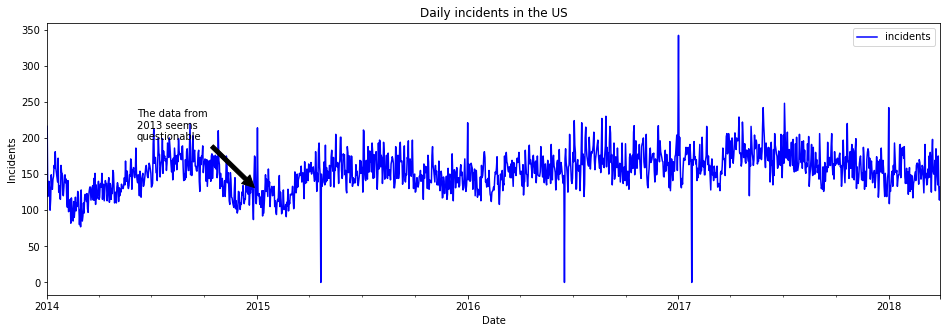

In [223]:
# Group by day, count incidens, plot graph
incident_df = gv_df.groupby(pd.Grouper(freq='d')).agg({'incident_id':'count'}).rename(columns={'incident_id':'incidents'})
incident_df.plot(figsize=(16,5), title='Daily incidents in the US', color='b')

text = 'The data from\n2013 seems\nquestionable'
plt.annotate(text, (incident_df.index[364], incident_df.incidents[364]), xytext=(-120, 50), textcoords='offset points', arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Date')
plt.ylabel('Incidents')
plt.show()

In [224]:
# dropping 2013 data
gv_df = gv_df.loc['2014':]
gv_df.shape

(239399, 33)

In [225]:
# get population by state from Census data
pop_df_agg = pop_df.groupby('NAME').agg({'POPESTIMATE2014': 'sum', 'POPESTIMATE2015': 'sum', 'POPESTIMATE2016': 'sum',
                            'POPESTIMATE2017': 'sum', 'POPESTIMATE2018': 'sum'
                            } )
pop_df_agg = pop_df_agg.apply(lambda x: x/1000000)
pop_df_agg.reset_index(inplace=True)

pop_df_agg.rename(columns={'NAME':'state'}, inplace=True)
pop_df_agg.head()

state  POPESTIMATE2014  POPESTIMATE2015  POPESTIMATE2016  \
0     Alabama        19.369924        19.412640        19.458980   
1      Alaska         2.945228         2.950188         2.966016   
2     Arizona        26.935360        27.334384        27.781808   
3    Arkansas        11.870904        11.913628        11.961640   
4  California       154.500556       155.812568       156.836508   

   POPESTIMATE2017  POPESTIMATE2018  
0        19.500480        19.551484  
1         2.959144         2.949752  
2        28.195504        28.686584  
3        12.011988        12.055300  
4       157.597396       158.228180

Text(0.5, 1.0, 'Incidents grouped by day')

Text(0.5, 1.0, 'Incidents grouped by week')

Text(0.5, 1.0, 'Incidents grouped by month')

Text(0.5, 1.0, 'Incidents grouped by year')

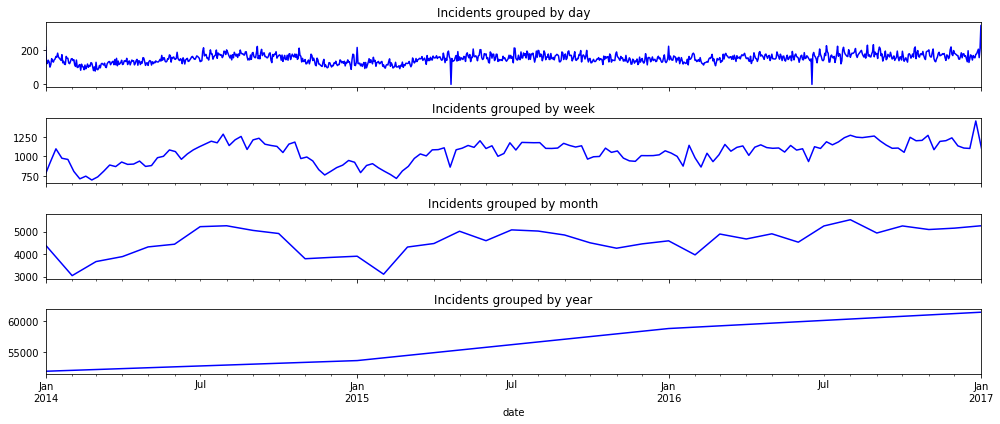

In [226]:
f, axarr = plt.subplots(4, sharex=True, figsize=(14,6))
gv_df.groupby(pd.Grouper(freq='d')).incident_id.count().plot(ax=axarr[0], color='b')
gv_df.groupby(pd.Grouper(freq='w')).incident_id.count().plot(ax=axarr[1], color='b')
gv_df.groupby(pd.Grouper(freq='m')).incident_id.count().plot(ax=axarr[2], color='b')
gv_df.loc['2014-Jan':'2017-Dec'].groupby(pd.Grouper(freq='y')).incident_id.count().plot(ax=axarr[3], color='b')
axarr[0].set_title('Incidents grouped by day')
axarr[1].set_title('Incidents grouped by week')
axarr[2].set_title('Incidents grouped by month')
axarr[3].set_title('Incidents grouped by year')
# axarr[3].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# axarr[3].xaxis.set_minor_locator(mdates.YearLocator())

plt.tight_layout()
plt.show()

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

Text(0.5, 1.0, 'Total Number of people killed and injured across years')

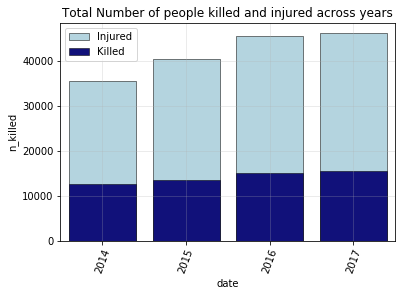

In [227]:
year_df = gv_df.loc['2014-Jan':'2017-Dec'].groupby(gv_df.loc['2014-Jan':'2017-Dec'].index.year)[["n_killed","n_injured",'hurt']].sum()
year_df.reset_index(inplace=True)

# .plot(kind="bar",stacked=True,
#                                                             figsize=(13,7),
#                                                             linewidth = 1)
# #                                                             edgecolor = "k"*data["year"].nunique())
# plt.grid(True,alpha=.3)
# plt.xticks(rotation=0)
# fig.set_facecolor("ghostwhite")
# plt.legend(prop={"size":20})
# plt.title("NUMBER OF PEOPLE KILLED AND INJURED IN YEARS",fontsize = 20)

# plt.show()


sns.barplot("date","hurt",
            data=year_df,color="lightblue",label="Injured",
            linewidth = .5 ,edgecolor ="k" * year_df["date"].nunique())
sns.barplot("date","n_killed",
            data=year_df,color="darkblue",label="Killed",
           linewidth = .5 ,edgecolor = "k" * year_df["date"].nunique())
plt.legend(loc="best",prop = {"size" : 10})
plt.xticks(rotation = 70)
plt.title("Total Number of people killed and injured across years")
plt.grid(True,alpha=.3)
plt.show()


Text(0.5, 1.0, 'Number of Incidents')

Text(0.5, 1.0, 'Total Deaths')

Text(0.5, 1.0, 'Total Injured')

Text(0, 0.5, 'Count')

Text(0, 0.5, 'Count')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Month')

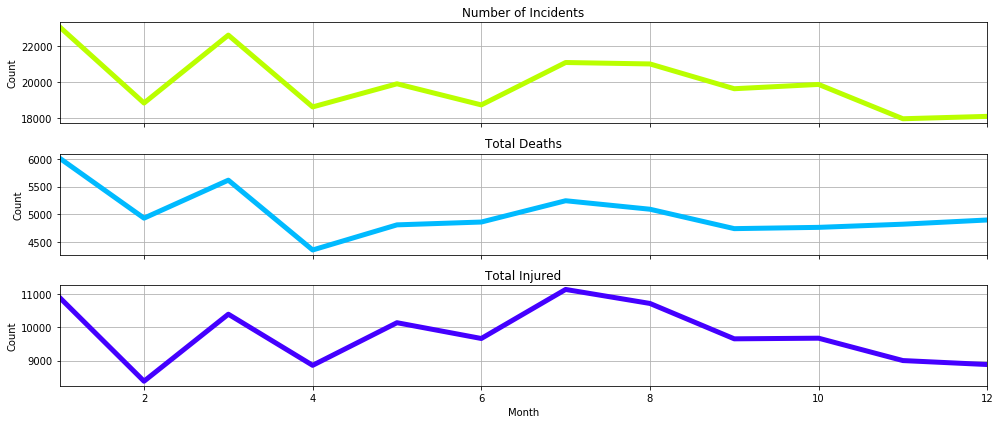

In [228]:
# Compute the DataFrame grouped by weekday
monthly_trend_df = gv_df.groupby(gv_df.index.month).agg({'incident_id':'count', 'n_killed':'sum', 'n_injured': 'sum'})

# monthly_trend_df.columns = ['_'.join(col).strip() for col in monthly_trend_df.columns.values]

# Create subplots
f, ax = plt.subplots(3, sharex=True, figsize=(14,6))
monthly_trend_df.incident_id.plot(ax=ax[0], grid=True, color='#baff00', linewidth=5)
monthly_trend_df['n_killed'].rename(columns={'n_killed':'killed'}).plot(ax=ax[1], grid=True, color='#00baff', linewidth=5)
monthly_trend_df['n_injured'].rename(columns={'n_injured':'injured'}).plot(ax=ax[2], grid=True, color='#4400ff', linewidth=5)
ax[0].set_title('Number of Incidents')
ax[1].set_title('Total Deaths')
ax[2].set_title('Total Injured')
ax[0].set_ylabel('Count')
ax[1].set_ylabel('Count')
ax[2].set_ylabel('Count')
# plt.xticks(range(0, len(yearly_trend_df.index.values)), yearly_trend_df.index.values)
plt.xlabel('Month')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Number of Incidents')

Text(0.5, 1.0, 'Total Deaths')

Text(0.5, 1.0, 'Total Injured')

Text(0, 0.5, 'Count')

Text(0, 0.5, 'Count')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Weekday')

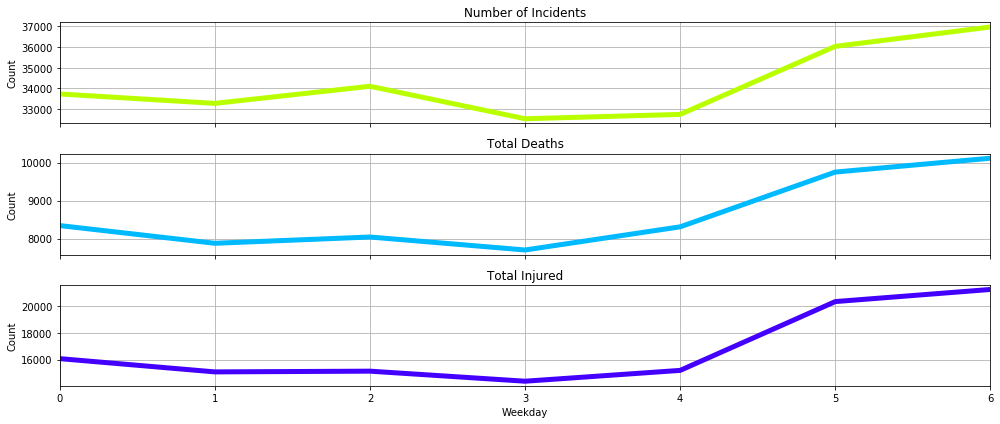

In [229]:
# Compute the DataFrame grouped by weekday
weekly_trend_df = gv_df.groupby(gv_df.index.weekday).agg({'incident_id':'count', 'n_killed':'sum', 'n_injured': 'sum'})

# Create subplots
f, ax = plt.subplots(3, sharex=True, figsize=(14,6))
weekly_trend_df.incident_id.plot(ax=ax[0], grid=True, color='#baff00', linewidth=5)
weekly_trend_df['n_killed'].rename(columns={'n_killed':'killed'}).plot(ax=ax[1], grid=True, color='#00baff', linewidth=5)
weekly_trend_df['n_injured'].rename(columns={'n_injured':'injured'}).plot(ax=ax[2], grid=True, color='#4400ff', linewidth=5)
ax[0].set_title('Number of Incidents')
ax[1].set_title('Total Deaths')
ax[2].set_title('Total Injured')
ax[0].set_ylabel('Count')
ax[1].set_ylabel('Count')
ax[2].set_ylabel('Count')
# plt.xticks(range(0, len(yearly_trend_df.index.values)), yearly_trend_df.index.values)
plt.xlabel('Weekday')
plt.tight_layout()
plt.show()

# State Level Analysis

In [230]:
gv_df = gv_df.merge(pop_df_agg, on='state').drop('Unnamed: 0', axis=1)

gv_df.POPESTIMATE2017.isnull().sum()

gv_df.head()

0

incident_id     state city_or_county  n_killed  n_injured  latitude  \
0        95289  Michigan       Muskegon         0          0   43.2301   
1        92607  Michigan        Detroit         0          1   42.4142   
2        92602  Michigan        Detroit         2          2   42.3484   
3        92620  Michigan        Detroit         0          2   42.3756   
4        92612  Michigan        Detroit         0          1   42.3727   

  location_description  longitude  n_guns_involved  children  ...  Terrorism  \
0                  NaN   -86.2514              NaN         0  ...          0   
1                  NaN   -82.9582              NaN         0  ...          0   
2                  NaN   -83.0597              NaN         0  ...          0   
3                  NaN   -83.0643              NaN         0  ...          0   
4                  NaN   -83.1921              NaN         0  ...          0   

     Month  DayofWeek  Year  hurt  POPESTIMATE2014  POPESTIMATE2015  \
0  January  Wednesday  2014     0        39.722356        39.730292   
1  January  Wednesday  2014     1        39.722356        39.730292   
2  January  Wednesday  2014     4        39.722356        39.730292   
3  January  Wednesday  2014     2        39.722356        39.730292   
4  January  Wednesday  2014     1        39.722356        39.730292   

   POPESTIMATE2016  POPESTIMATE2017  POPESTIMATE2018  
0         39.80756        39.905788         39.98366  
1         39.80756        39.905788         39.98366  
2         39.80756        39.905788         39.98366  
3         39.80756        39.905788         39.98366  
4         39.80756        39.905788         39.98366  

[5 rows x 37 columns]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

Text(0.5, 1.0, 'Total Number of people killed and injured for top cities')

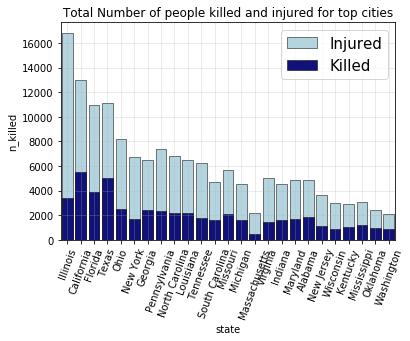

In [231]:
state_df = gv_df.groupby('state').agg({'incident_id': 'count', 'n_killed': 'sum', 'n_injured': 'sum', 'hurt': 'sum'}).sort_values(by='incident_id', ascending=False)

state_df.reset_index(inplace=True)

sns.barplot("state","hurt",
            data=state_df[:25],color="lightblue",label="Injured",
            linewidth = .5 ,edgecolor ="k" * state_df["state"].nunique())
sns.barplot("state","n_killed",
            data=state_df[:25],color="darkblue",label="Killed",
           linewidth = .5 ,edgecolor = "k" * state_df["state"].nunique())
plt.legend(loc="best",prop = {"size" : 15})
plt.xticks(rotation = 70)
plt.title("Total Number of people killed and injured for top cities")
plt.grid(True,alpha=.3)
plt.show()

In [232]:
# Rename the states for a correct mapping
state_to_code = {'District of Columbia' : 'dc','Mississippi': 'MS', 'Oklahoma': 'OK', 'Delaware': 'DE',
                 'Minnesota': 'MN', 'Illinois': 'IL', 'Arkansas': 'AR', 'New Mexico': 'NM', 'Indiana': 'IN',
                 'Maryland': 'MD', 'Louisiana': 'LA', 'Idaho': 'ID', 'Wyoming': 'WY', 'Tennessee': 'TN',
                 'Arizona': 'AZ', 'Iowa': 'IA', 'Michigan': 'MI', 'Kansas': 'KS', 'Utah': 'UT', 'Virginia': 'VA',
                 'Oregon': 'OR', 'Connecticut': 'CT', 'Montana': 'MT', 'California': 'CA', 'Massachusetts': 'MA',
                 'West Virginia': 'WV', 'South Carolina': 'SC', 'New Hampshire': 'NH', 'Wisconsin': 'WI',
                 'Vermont': 'VT', 'Georgia': 'GA', 'North Dakota': 'ND', 'Pennsylvania': 'PA', 'Florida': 'FL',
                 'Alaska': 'AK', 'Kentucky': 'KY', 'Hawaii': 'HI', 'Nebraska': 'NE', 'Missouri': 'MO', 'Ohio': 'OH',
                 'Alabama': 'AL', 'Rhode Island': 'RI', 'South Dakota': 'SD', 'Colorado': 'CO', 'New Jersey': 'NJ',
                 'Washington': 'WA', 'North Carolina': 'NC', 'New York': 'NY', 'Texas': 'TX', 'Nevada': 'NV', 'Maine': 'ME'}

state_df['state_code'] = state_df['state'].apply(lambda x : state_to_code[x])

# Store the data of the subplots
data = []
# Layout for the whole plot
layout = dict(title = 'Deaths grouped by state',
              width = 750,
              height = 400,
              hovermode = True)

# Count-Plot (data and layout)
data.append(dict(type = 'choropleth',
                 colorscale = [[0.0, '#baff00'],[1.0, '#000000']],
                 autocolorscale = False,
                 locations = state_df['state_code'],
                 geo = 'geo',
                 z = state_df['incident_id'],
                 text = state_df['state'],
                 locationmode = 'USA-states',
                 marker = dict(line = dict (color = 'rgb(255,255,255)',
                                            width = 2)),
                 colorbar = dict(title = "Incidents",
                                 x=0.29,
                                 thickness=10)))
 
layout['geo'] = dict(scope = 'usa',
                      showland=True,
                      projection=dict(type='albers usa'),
                      showlakes = True,
                      lakecolor = 'rgb(255, 255, 255)',
                      landcolor = 'rgb(229, 229, 229)',
                      subunitcolor = "rgb(255, 255, 255)",
                      domain = dict(x = [0/3,1/3], y = [0,1]))

# Sum-Plot (data and layout)
data.append(dict(type = 'choropleth',
                 colorscale = [[0.0, '#00baff'],[1.0, '#000000']],
                 autocolorscale = False,
                 locations = state_df['state_code'],
                 geo = 'geo2',
                 z = state_df['n_killed'],
                 text = state_df['state'],
                 locationmode = 'USA-states',
                 marker = dict(line = dict (color = 'rgb(255,255,255)',
                                            width = 2)),
                 colorbar = dict(title = "Deaths",
                                 x=0.6225,
                                 thickness=10)))
layout['geo2'] = dict(scope = 'usa',
                      showland=True,
                      projection=dict(type='albers usa'),
                      showlakes = True,
                      lakecolor = 'rgb(255, 255, 255)',
                      landcolor = 'rgb(229, 229, 229)',
                      subunitcolor = "rgb(255, 255, 255)",
                      domain = dict(x = [1/3,2/3], y = [0,1]))

# Mean-Plot (data and layout)
data.append(dict(type = 'choropleth',
                 colorscale = [[0.0, '#ffba00'],[1.0, '#000000']],
                 autocolorscale = False,
                 locations = state_df['state_code'],
                 geo = 'geo3',
                 z = state_df['n_injured'],
                 text = state_df['state'],
                 locationmode = 'USA-states',
                 marker = dict(line = dict (color = 'rgb(255,255,255)',
                                            width = 2)),
                 colorbar = dict(title = "Injured",
                                 x=0.96,
                                 thickness=10)))
 
layout['geo3'] = dict(scope = 'usa',
                      showland=True,
                      projection=dict(type='albers usa'),
                      showlakes = True,
                      lakecolor = 'rgb(255, 255, 255)',
                      landcolor = 'rgb(229, 229, 229)',
                      subunitcolor = "rgb(255, 255, 255)",
                      domain = dict(x = [2/3,3/3], y = [0,1]))

# Create the subplots
fig = {'data':data, 'layout':layout}
iplot(fig)

## Incident Analysis

In [233]:
gv_df['Children/School'] = gv_df['Incident at School'] + gv_df['Children Injured/Killed']

gv_df['Drug/Gang Related'] = gv_df['Gang Related'] + gv_df['Drug Related']

array(['incident_id', 'state', 'city_or_county', 'n_killed', 'n_injured',
       'latitude', 'location_description', 'longitude', 'n_guns_involved',
       'children', 'teen', 'adults', 'Male', 'Female',
       'Accidental Shooting', 'Attempted Murder/Suicide', 'Armed Robbery',
       'Bar/Club Incident', 'Children Injured/Killed', 'Defensive Use',
       'Drug Related', 'Gang Related', 'Incident at School',
       'Home Invastion', 'Mass Shooting', 'Murder/Suicide',
       'OfficerInvolved', 'Terrorism', 'Month', 'DayofWeek', 'Year',
       'hurt', 'POPESTIMATE2014', 'POPESTIMATE2015', 'POPESTIMATE2016',
       'POPESTIMATE2017', 'POPESTIMATE2018', 'Children/School',
       'Drug/Gang Related'], dtype=object)

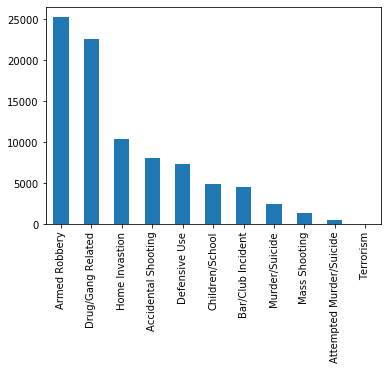

In [234]:
gv_df.columns.values

gv_df[['Accidental Shooting', 'Attempted Murder/Suicide', 'Armed Robbery',
       'Bar/Club Incident', 'Children/School', 'Defensive Use',
       'Drug/Gang Related', 
       'Home Invastion', 'Mass Shooting', 'Murder/Suicide',
        'Terrorism']].sum().sort_values(ascending=False).plot(kind='bar')

<BarContainer object of 5 artists>

([<matplotlib.axis.XTick at 0x20abbe1d630>,
 <a list of 5 Text xticklabel objects>)

{'Armed Robbery': 0.133716323296355,
 'Drug Related': 0.13312109421058838,
 'Gang Related': 0.28933645027872684,
 'Bar/Club Incident': 0.3151785714285714,
 'Children/School': 0.24429967426710097}

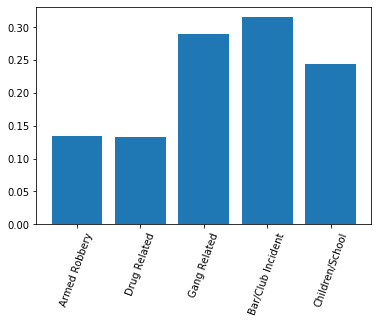

In [235]:
# Mortality Rates by incident
mortality_rate = {}
mortality_rate['Armed Robbery'] = gv_df[gv_df['Armed Robbery']==1]['n_killed'].sum()/gv_df[gv_df['Armed Robbery']==1]['incident_id'].count()
mortality_rate['Drug Related'] = gv_df[gv_df['Drug Related']==1]['n_killed'].sum()/gv_df[gv_df['Drug Related']==1]['incident_id'].count()
mortality_rate['Gang Related'] = gv_df[gv_df['Gang Related']==1]['n_killed'].sum()/gv_df[gv_df['Gang Related']==1]['incident_id'].count()
mortality_rate['Bar/Club Incident'] = gv_df[gv_df['Bar/Club Incident']==1]['n_killed'].sum()/gv_df[gv_df['Bar/Club Incident']==1]['incident_id'].count()
mortality_rate['Children/School'] = gv_df[gv_df['Children/School']==1]['n_killed'].sum()/gv_df[gv_df['Children/School']==1]['incident_id'].count()

# mortality_rate = sorted(mortality_rate.items(), key=lambda kv: kv[1])

plt.bar(range(len(mortality_rate)), list(mortality_rate.values()), align='center')
plt.xticks(range(len(mortality_rate)), list(mortality_rate.keys()), rotation = 70)

mortality_rate

In [236]:
state_df = gv_df.groupby('state').agg({'Armed Robbery': 'sum', 'Drug/Gang Related': 'sum', 'Drug Related': 'sum',
                                       'Gang Related': 'sum', 'Children/School': 'sum', 'Bar/Club Incident': 'sum'})

state_df.reset_index(inplace=True)

state_df['state_code'] = state_df['state'].apply(lambda x : state_to_code[x])

state_df.head(3)

state  Armed Robbery  Drug/Gang Related  Drug Related  Gang Related  \
0  Alabama            551                127           120             7   
1   Alaska             80                119           115             4   
2  Arizona            177                134           108            26   

   Children/School  Bar/Club Incident state_code  
0              146                 77         AL  
1               21                 21         AK  
2               57                 44         AZ

In [237]:
gv_df.groupby('state')[['Armed Robbery']].agg(sum).sort_values(by='Armed Robbery', ascending=False).head(5)
# gv_df.groupby('state')[['Drug/Gang Related']].agg(sum).sort_values(by='Drug/Gang Related', ascending=False).head(5)
gv_df.groupby('state')[['Gang Related']].agg(sum).sort_values(by='Gang Related', ascending=False).head(5)
gv_df.groupby('state')[['Drug Related']].agg(sum).sort_values(by='Drug Related', ascending=False).head(5)
gv_df.groupby('state')[['Children/School']].agg(sum).sort_values(by='Children/School', ascending=False).head(5)
gv_df.groupby('state')[['Bar/Club Incident']].agg(sum).sort_values(by='Bar/Club Incident', ascending=False).head(5)


gv_df.groupby('city_or_county')[['Armed Robbery']].agg(sum).sort_values(by='Armed Robbery', ascending=False).head(5)
# gv_df.groupby('city_or_county')[['Drug/Gang Related']].agg(sum).sort_values(by='Drug/Gang Related', ascending=False).head(5)
gv_df.groupby('city_or_county')[['Gang Related']].agg(sum).sort_values(by='Gang Related', ascending=False).head(5)
gv_df.groupby('city_or_county')[['Drug Related']].agg(sum).sort_values(by='Drug Related', ascending=False).head(5)
gv_df.groupby('city_or_county')[['Children/School']].agg(sum).sort_values(by='Children/School', ascending=False).head(5)
gv_df.groupby('city_or_county')[['Bar/Club Incident']].agg(sum).sort_values(by='Bar/Club Incident', ascending=False).head(5)

Armed Robbery
state                  
Texas              1760
Florida            1666
Illinois           1468
Ohio               1318
Georgia            1259

Gang Related
state                   
Illinois            1663
California          1339
Oregon               301
New York             229
Washington           177

Drug Related
state                      
New York               1056
California             1023
Florida                1002
Massachusetts           975
Texas                   828

Children/School
state                     
Florida                375
Texas                  350
Ohio                   290
Georgia                255
Tennessee              231

Bar/Club Incident
state                            
Ohio                          372
Texas                         342
Florida                       328
Pennsylvania                  259
South Carolina                232

Armed Robbery
city_or_county               
New Orleans               681
Chicago                   637
Washington                612
Houston                   444
Saint Louis               345

Gang Related
city_or_county              
Chicago                 1375
Portland                 266
Fresno                   254
Bakersfield              105
Los Angeles               93

Drug Related
city_or_county              
Baltimore                427
Boston                   221
Springfield              191
Hartford                 151
Indianapolis             147

Children/School
city_or_county                 
Memphis                      80
Chicago                      67
Houston                      65
Columbus                     62
Jacksonville                 61

Bar/Club Incident
city_or_county                   
Philadelphia                   90
Houston                        84
Columbus                       78
Cleveland                      73
Chicago                        60

In [238]:
data = []
# Layout for the whole plot
layout = dict(title = 'Drug Related',
              width = 1000,
              height = 400,
              hovermode = True)

# Count-Plot (data and layout)
data.append(dict(type = 'choropleth',
                 colorscale = [[0.0, '#00baff'],[1.0, '#000000']],
                 autocolorscale = False,
                 locations = state_df['state_code'],
                 geo = 'geo',
                 z = state_df['Drug Related'],
                 text = state_df['state'],
                 locationmode = 'USA-states',
                 marker = dict(line = dict (color = 'rgb(255,255,255)',
                                            width = 2)),
                 colorbar = dict(title = "Incidents",
                                 x=0.01,
                                 thickness=10)))
 
layout['geo'] = dict(scope = 'usa',
                      showland=True,
                      projection=dict(type='albers usa'),
                      showlakes = True,
                      lakecolor = 'rgb(255, 255, 255)',
                      landcolor = 'rgb(229, 229, 229)',
                      subunitcolor = "rgb(255, 255, 255)",
                      domain = dict(x = [0,1], y = [0,1]))

# Create the subplots
fig = {'data':data, 'layout':layout}
iplot(fig)

In [239]:
data = []
# Layout for the whole plot
layout = dict(title = 'Gang Related',
              width = 1000,
              height = 400,
              hovermode = True)

# Count-Plot (data and layout)
data.append(dict(type = 'choropleth',
                 colorscale = [[0.0, '#00baff'],[1.0, '#000000']],
                 autocolorscale = False,
                 locations = state_df['state_code'],
                 geo = 'geo',
                 z = state_df['Gang Related'],
                 text = state_df['state'],
                 locationmode = 'USA-states',
                 marker = dict(line = dict (color = 'rgb(255,255,255)',
                                            width = 2)),
                 colorbar = dict(title = "Incidents",
                                 x=0.01,
                                 thickness=10)))
 
layout['geo'] = dict(scope = 'usa',
                      showland=True,
                      projection=dict(type='albers usa'),
                      showlakes = True,
                      lakecolor = 'rgb(255, 255, 255)',
                      landcolor = 'rgb(229, 229, 229)',
                      subunitcolor = "rgb(255, 255, 255)",
                      domain = dict(x = [0,1], y = [0,1]))

# Create the subplots
fig = {'data':data, 'layout':layout}
iplot(fig)

In [240]:
data = []
# Layout for the whole plot
layout = dict(title = 'Bar/Club Incident',
              width = 1000,
              height = 400,
              hovermode = True)

# Count-Plot (data and layout)
data.append(dict(type = 'choropleth',
                 colorscale = [[0.0, '#00baff'],[1.0, '#000000']],
                 autocolorscale = False,
                 locations = state_df['state_code'],
                 geo = 'geo',
                 z = state_df['Bar/Club Incident'],
                 text = state_df['state'],
                 locationmode = 'USA-states',
                 marker = dict(line = dict (color = 'rgb(255,255,255)',
                                            width = 2)),
                 colorbar = dict(title = "Incidents",
                                 x=0.01,
                                 thickness=10)))
 
layout['geo'] = dict(scope = 'usa',
                      showland=True,
                      projection=dict(type='albers usa'),
                      showlakes = True,
                      lakecolor = 'rgb(255, 255, 255)',
                      landcolor = 'rgb(229, 229, 229)',
                      subunitcolor = "rgb(255, 255, 255)",
                      domain = dict(x = [0,1], y = [0,1]))

# Create the subplots
fig = {'data':data, 'layout':layout}
iplot(fig)

In [241]:
data = []
# Layout for the whole plot
layout = dict(title = 'Children/School',
              width = 1000,
              height = 400,
              hovermode = True)

# Count-Plot (data and layout)
data.append(dict(type = 'choropleth',
                 colorscale = [[0.0, '#00baff'],[1.0, '#000000']],
                 autocolorscale = False,
                 locations = state_df['state_code'],
                 geo = 'geo',
                 z = state_df['Children/School'],
                 text = state_df['state'],
                 locationmode = 'USA-states',
                 marker = dict(line = dict (color = 'rgb(255,255,255)',
                                            width = 2)),
                 colorbar = dict(title = "Incidents",
                                 x=0.01,
                                 thickness=10)))
 
layout['geo'] = dict(scope = 'usa',
                      showland=True,
                      projection=dict(type='albers usa'),
                      showlakes = True,
                      lakecolor = 'rgb(255, 255, 255)',
                      landcolor = 'rgb(229, 229, 229)',
                      subunitcolor = "rgb(255, 255, 255)",
                      domain = dict(x = [0,1], y = [0,1]))

# Create the subplots
fig = {'data':data, 'layout':layout}
iplot(fig)

In [242]:
data = []
# Layout for the whole plot
layout = dict(title = 'Armed Robbery',
              width = 1000,
              height = 400,
              hovermode = True)

# Count-Plot (data and layout)
data.append(dict(type = 'choropleth',
                 colorscale = [[0.0, '#00baff'],[1.0, '#000000']],
                 autocolorscale = False,
                 locations = state_df['state_code'],
                 geo = 'geo',
                 z = state_df['Armed Robbery'],
                 text = state_df['state'],
                 locationmode = 'USA-states',
                 marker = dict(line = dict (color = 'rgb(255,255,255)',
                                            width = 2)),
                 colorbar = dict(title = "Incidents",
                                 x=0.01,
                                 thickness=10)))
 
layout['geo'] = dict(scope = 'usa',
                      showland=True,
                      projection=dict(type='albers usa'),
                      showlakes = True,
                      lakecolor = 'rgb(255, 255, 255)',
                      landcolor = 'rgb(229, 229, 229)',
                      subunitcolor = "rgb(255, 255, 255)",
                      domain = dict(x = [0,1], y = [0,1]))

# Create the subplots
fig = {'data':data, 'layout':layout}
iplot(fig)

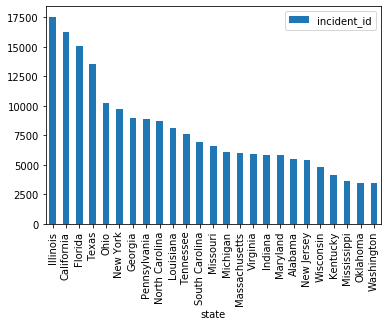

In [243]:
gv_df.groupby('state')[['incident_id']].count().sort_values(by='incident_id',ascending=False).head(25).plot(kind='bar')

## 1. Illinois

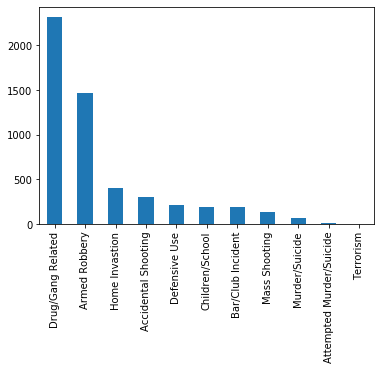

In [244]:
gv_df[gv_df['state']=='Illinois'][['Accidental Shooting', 'Attempted Murder/Suicide', 'Armed Robbery',
       'Bar/Club Incident', 'Children/School', 'Defensive Use',
       'Drug/Gang Related', 
       'Home Invastion', 'Mass Shooting', 'Murder/Suicide',
        'Terrorism']].sum().sort_values(ascending=False).plot(kind='bar')


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

Text(0.5, 1.0, 'Total Number of people killed and injured for top cities')

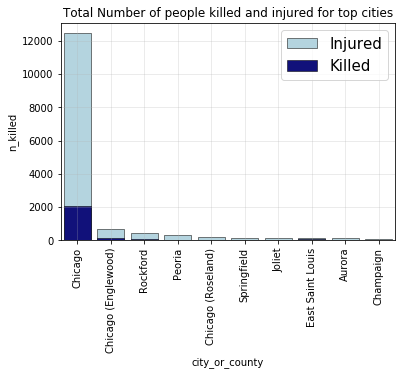

In [256]:
city_df = gv_df[gv_df['state']=='Illinois'].groupby('city_or_county').agg({'hurt': 'sum', 'n_killed': 'sum', 'n_injured': 'sum'}).sort_values(by='hurt', ascending=False)[:10]

city_df.reset_index(inplace=True)

sns.barplot("city_or_county","hurt",
            data=city_df,color="lightblue",label="Injured",
            linewidth = .5 ,edgecolor ="k" * city_df["city_or_county"].nunique())
sns.barplot("city_or_county","n_killed",
            data=city_df,color="darkblue",label="Killed",
           linewidth = .5 ,edgecolor = "k" * city_df["city_or_county"].nunique())
plt.legend(loc="best",prop = {"size" : 15})
plt.xticks(rotation = 90)
plt.title("Total Number of people killed and injured for top cities")
plt.grid(True,alpha=.3)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

Text(0.5, 1.0, 'Total Number of people killed and injured for top cities')

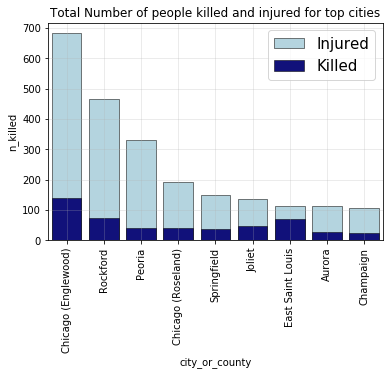

In [255]:
city_df = gv_df[gv_df['state']=='Illinois'].groupby('city_or_county').agg({'hurt': 'sum', 'n_killed': 'sum', 'n_injured': 'sum'}).sort_values(by='hurt', ascending=False)[1:10]

city_df.reset_index(inplace=True)

sns.barplot("city_or_county","hurt",
            data=city_df,color="lightblue",label="Injured",
            linewidth = .5 ,edgecolor ="k" * city_df["city_or_county"].nunique())
sns.barplot("city_or_county","n_killed",
            data=city_df,color="darkblue",label="Killed",
           linewidth = .5 ,edgecolor = "k" * city_df["city_or_county"].nunique())
plt.legend(loc="best",prop = {"size" : 15})
plt.xticks(rotation = 90)
plt.title("Total Number of people killed and injured for top cities")
plt.grid(True,alpha=.3)
plt.show()

## 2.California

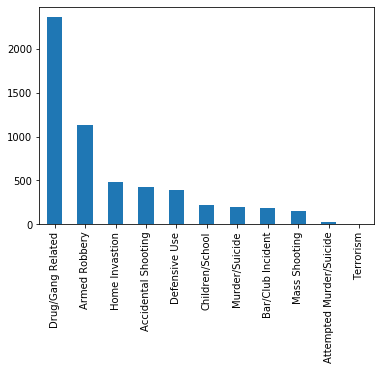

In [187]:
gv_df[gv_df['state']=='California'][['Accidental Shooting', 'Attempted Murder/Suicide', 'Armed Robbery',
       'Bar/Club Incident', 'Children/School', 'Defensive Use',
       'Drug/Gang Related', 
       'Home Invastion', 'Mass Shooting', 'Murder/Suicide',
        'Terrorism']].sum().sort_values(ascending=False).plot(kind='bar')


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

Text(0.5, 1.0, 'Total Number of people killed and injured for top cities')

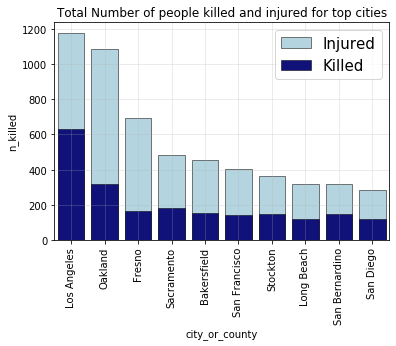

In [254]:
city_df = gv_df[gv_df['state']=='California'].groupby('city_or_county').agg({'hurt': 'sum', 'n_killed': 'sum', 'n_injured': 'sum'}).sort_values(by='hurt', ascending=False)[:10]

city_df.reset_index(inplace=True)

sns.barplot("city_or_county","hurt",
            data=city_df,color="lightblue",label="Injured",
            linewidth = .5 ,edgecolor ="k" * city_df["city_or_county"].nunique())
sns.barplot("city_or_county","n_killed",
            data=city_df,color="darkblue",label="Killed",
           linewidth = .5 ,edgecolor = "k" * city_df["city_or_county"].nunique())
plt.legend(loc="best",prop = {"size" : 15})
plt.xticks(rotation = 90)
plt.title("Total Number of people killed and injured for top cities")
plt.grid(True,alpha=.3)
plt.show()

In [204]:
gv_df[(gv_df['city_or_county']=='Oakland') & (gv_df['state']=='California')][['n_injured','n_killed']].sum()

n_injured    769
n_killed     319
dtype: int64

## 3.Florida

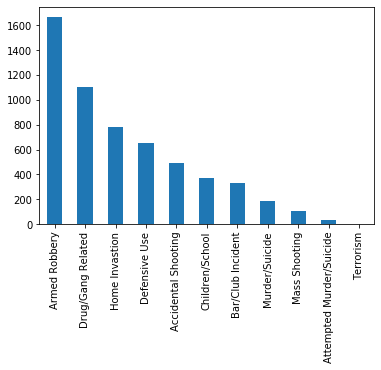

In [189]:
gv_df[gv_df['state']=='Florida'][['Accidental Shooting', 'Attempted Murder/Suicide', 'Armed Robbery',
       'Bar/Club Incident', 'Children/School', 'Defensive Use',
       'Drug/Gang Related', 
       'Home Invastion', 'Mass Shooting', 'Murder/Suicide',
        'Terrorism']].sum().sort_values(ascending=False).plot(kind='bar')


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

Text(0.5, 1.0, 'Total Number of people killed and injured for top cities')

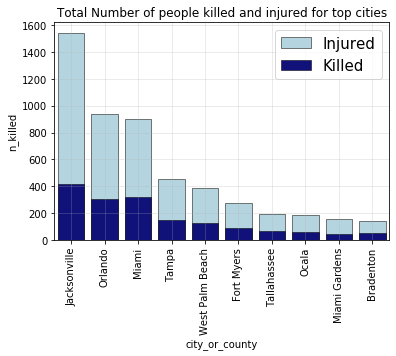

In [253]:
city_df = gv_df[gv_df['state']=='Florida'].groupby('city_or_county').agg({'hurt': 'sum', 'n_killed': 'sum', 'n_injured': 'sum'}).sort_values(by='hurt', ascending=False)[:10]

city_df.reset_index(inplace=True)

sns.barplot("city_or_county","hurt",
            data=city_df,color="lightblue",label="Injured",
            linewidth = .5 ,edgecolor ="k" * city_df["city_or_county"].nunique())
sns.barplot("city_or_county","n_killed",
            data=city_df,color="darkblue",label="Killed",
           linewidth = .5 ,edgecolor = "k" * city_df["city_or_county"].nunique())
plt.legend(loc="best",prop = {"size" : 15})
plt.xticks(rotation = 90)
plt.title("Total Number of people killed and injured for top cities")
plt.grid(True,alpha=.3)
plt.show()

## 4.Texas

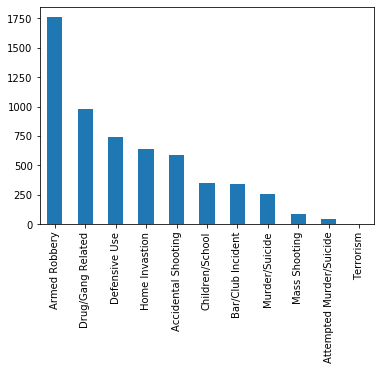

In [180]:
gv_df[gv_df['state']=='Texas'][['Accidental Shooting', 'Attempted Murder/Suicide', 'Armed Robbery',
       'Bar/Club Incident', 'Children/School', 'Defensive Use',
       'Drug/Gang Related', 
       'Home Invastion', 'Mass Shooting', 'Murder/Suicide',
        'Terrorism']].sum().sort_values(ascending=False).plot(kind='bar')


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

Text(0.5, 1.0, 'Total Number of people killed and injured for top cities')

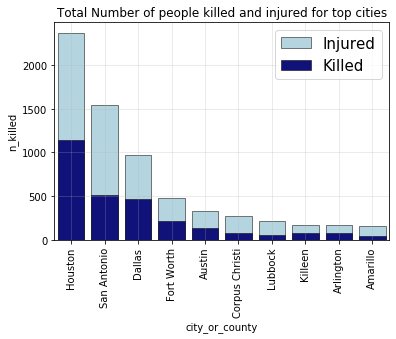

In [258]:
city_df = gv_df[gv_df['state']=='Texas'].groupby('city_or_county').agg({'hurt': 'sum', 'n_killed': 'sum', 'n_injured': 'sum'}).sort_values(by='hurt', ascending=False)[:10]

city_df.reset_index(inplace=True)

sns.barplot("city_or_county","hurt",
            data=city_df,color="lightblue",label="Injured",
            linewidth = .5 ,edgecolor ="k" * city_df["city_or_county"].nunique())
sns.barplot("city_or_county","n_killed",
            data=city_df,color="darkblue",label="Killed",
           linewidth = .5 ,edgecolor = "k" * city_df["city_or_county"].nunique())
plt.legend(loc="best",prop = {"size" : 15})
plt.xticks(rotation = 90)
plt.title("Total Number of people killed and injured for top cities")
plt.grid(True,alpha=.3)
plt.show()

# City or County Level Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

Text(0.5, 1.0, 'Total Number of people killed and injured for top cities')

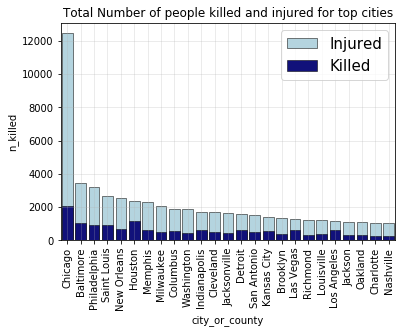

In [260]:
city_df = gv_df.groupby('city_or_county').agg({'hurt': 'sum', 'n_killed': 'sum', 'n_injured': 'sum'}).sort_values(by='hurt', ascending=False)[:25]

city_df.reset_index(inplace=True)

sns.barplot("city_or_county","hurt",
            data=city_df,color="lightblue",label="Injured",
            linewidth = .5 ,edgecolor ="k" * city_df["city_or_county"].nunique())
sns.barplot("city_or_county","n_killed",
            data=city_df,color="darkblue",label="Killed",
           linewidth = .5 ,edgecolor = "k" * city_df["city_or_county"].nunique())
plt.legend(loc="best",prop = {"size" : 15})
plt.xticks(rotation = 90)
plt.title("Total Number of people killed and injured for top cities")
plt.grid(True,alpha=.3)
plt.show()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

Text(0.5, 1.0, 'Total Number of people killed and injured for top cities')

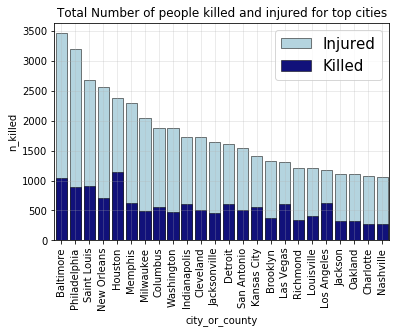

In [261]:
city_df = gv_df.groupby('city_or_county').agg({'hurt': 'sum', 'n_killed': 'sum', 'n_injured': 'sum'}).sort_values(by='hurt', ascending=False)[1:25]

city_df.reset_index(inplace=True)

sns.barplot("city_or_county","hurt",
            data=city_df,color="lightblue",label="Injured",
            linewidth = .5 ,edgecolor ="k" * city_df["city_or_county"].nunique())
sns.barplot("city_or_county","n_killed",
            data=city_df,color="darkblue",label="Killed",
           linewidth = .5 ,edgecolor = "k" * city_df["city_or_county"].nunique())
plt.legend(loc="best",prop = {"size" : 15})
plt.xticks(rotation = 90)
plt.title("Total Number of people killed and injured for top cities")
plt.grid(True,alpha=.3)
plt.show()


# Incident Causes

# Misc

In [ ]:
# gv_df['location_description'] = gv_df['location_description'].map(lambda x: x.lower())

In [ ]:
# # dangerous locations
# loc = gv_df[gv_df['location_description'].notnull()]["location_description"].value_counts().to_dict()
# wordcloud = WordCloud(height=600, width=800, background_color='white')
# wordcloud.generate_from_frequencies(frequencies=loc)
# plt.figure(figsize=(14,6))
# plt.title('Dangerous locations')
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()